In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Loading The Dataset

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train['label']
X_train = train.drop(labels = {'label'},axis = 1)

In [5]:
plt.figure(figsize=(9,6))
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<Figure size 900x600 with 0 Axes>

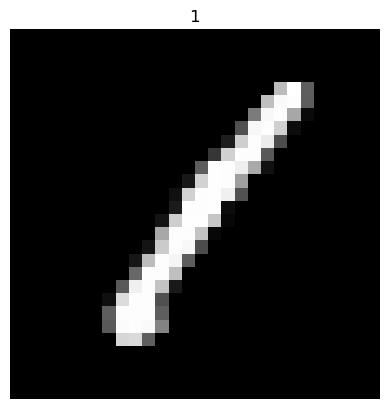

In [6]:
img = X_train.iloc[0].values
img = img.reshape([28,28])
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

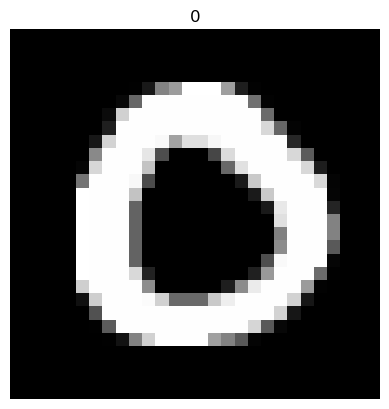

In [7]:
img = X_train.iloc[4].values
img = img.reshape([28,28])
plt.imshow(img,cmap='gray')
plt.title(train.iloc[4,0])
plt.axis('off')
plt.show()

In [8]:
#Normalize
X_train = X_train / 255.0
test = test / 255.0
print("X_train shape: ",X_train.shape)
print("test shape: ",test.shape)


X_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
X_train.values


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#Reshape
X_train = X_train.values.reshape(-1,28,28,1) #28*28=784
test = test = test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("test shape: ",test.shape)

X_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [13]:
#label encoding
from keras.utils.np_utils import to_categorical #convert to one hot encoder
Y_train = to_categorical(Y_train,num_classes =10)

In [14]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=2)#random state ko value jati halda ni farak pardaina
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [19]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout ,Flatten,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau


In [26]:
#first layer
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #neglecting 25%, normally less than 50%

#second layer
model.add(Conv2D(filters = 16,kernel_size = (3,3),padding = 'Same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
optimizer = Adam